# Importing libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## T-SNE

In [13]:
df_tsne = pd.read_csv("data_cleaned.csv")
df_tsne

,y/delta,y^+,U,dU/dy,W,P,Re_tau,u'u',v'v',w'w',u'v',u'w',v'w',k
0,0.007194,37.306840,14.043179,0.073700,-0.002314,-0.959060,5200,7.103153,0.958211,2.716161,-0.918212,0.000269,0.000138,5.388763
1,0.007452,38.646476,14.139232,0.069773,-0.002330,-0.980840,5200,7.006583,0.979975,2.725204,-0.921877,0.000319,0.000138,5.355881
2,0.007714,40.006557,14.231651,0.066194,-0.002346,-1.001492,5200,6.914939,1.000611,2.732887,-0.925190,0.000367,0.000139,5.324218
3,0.007981,41.387079,14.320739,0.062927,-0.002360,-1.021039,5200,6.828173,1.020141,2.739304,-0.928188,0.000413,0.000139,5.293809
4,0.008251,42.788036,14.406768,0.059940,-0.002373,-1.039507,5200,6.746199,1.038594,2.744540,-0.930902,0.000457,0.000139,5.264666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,0.924453,168.332085,18.229457,0.005679,-0.006407,-0.384075,180,0.671048,0.384075,0.392351,-0.069921,0.001988,-0.000115,0.723737
1463,0.941219,171.385008,18.244917,0.004445,-0.006349,-0.381970,180,0.657393,0.381970,0.387362,-0.054352,0.001856,-0.000092,0.713362
1464,0.958002,174.440956,18.256587,0.003189,-0.006322,-0.380388,180,0.646995,0.380388,0.383672,-0.038806,0.001726,-0.000071,0.705528
1465,0.974796,177.499065,18.264396,0.001917,-0.006324,-0.379334,180,0.640001,0.379334,0.381248,-0.023276,0.001629,-0.000046,0.700291


### Plot the correlation matrix using a heat map to identify the variables that are highly correlated with k

          y/delta       y^+         U     dU/dy         W         P    Re_tau  \
y/delta  1.000000  0.653625  0.695742 -0.514947 -0.054328  0.967690 -0.096346   
y^+      0.653625  1.000000  0.863473 -0.515469  0.125845  0.548989  0.560501   
U        0.695742  0.863473  1.000000 -0.820737  0.118278  0.556523  0.509919   
dU/dy   -0.514947 -0.515469 -0.820737  1.000000  0.055313 -0.321329 -0.354493   
W       -0.054328  0.125845  0.118278  0.055313  1.000000 -0.067824  0.197062   
P        0.967690  0.548989  0.556523 -0.321329 -0.067824  1.000000 -0.241195   
Re_tau  -0.096346  0.560501  0.509919 -0.354493  0.197062 -0.241195  1.000000   
u'u'    -0.952159 -0.581097 -0.665628  0.533723  0.067949 -0.937452  0.225547   
v'v'    -0.968252 -0.552460 -0.560358  0.323942  0.065931 -0.999980  0.236421   
w'w'    -0.954503 -0.584547 -0.693071  0.549293  0.059870 -0.940637  0.198179   
u'v'     0.999310  0.646798  0.676088 -0.482887 -0.052271  0.974629 -0.111866   
u'w'    -0.336374 -0.140848 

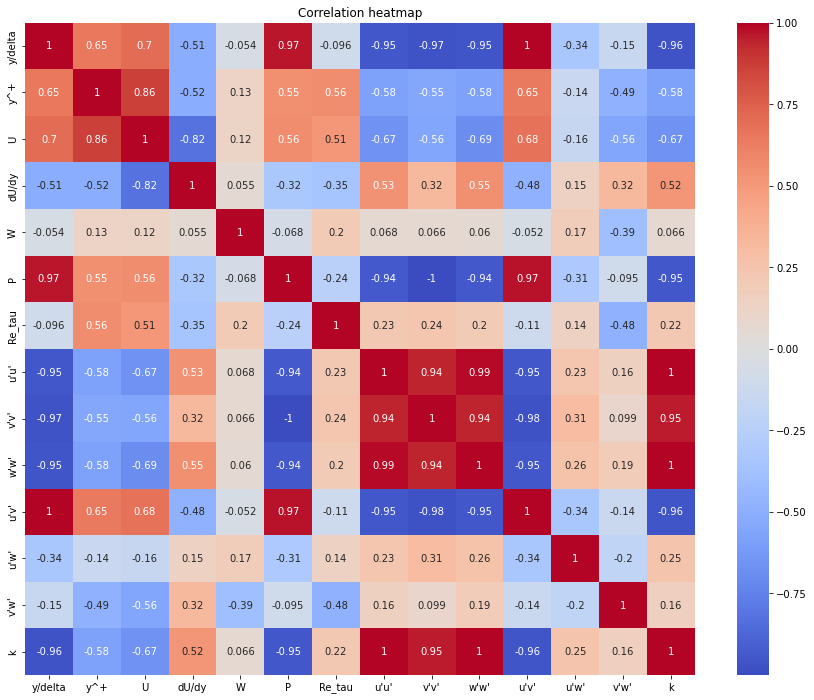

In [14]:
corr = df_tsne.corr()
print(corr)
plt.figure(figsize=(15,12 ))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [15]:
tsne_va = ["y/delta","u'u'","v'v'","w'w'","u'v'"]
df_tsne_g = df_tsne[tsne_va]
df_tsne_g

,y/delta,u'u',v'v',w'w',u'v'
0,0.007194,7.103153,0.958211,2.716161,-0.918212
1,0.007452,7.006583,0.979975,2.725204,-0.921877
2,0.007714,6.914939,1.000611,2.732887,-0.925190
3,0.007981,6.828173,1.020141,2.739304,-0.928188
4,0.008251,6.746199,1.038594,2.744540,-0.930902
...,...,...,...,...,...
1462,0.924453,0.671048,0.384075,0.392351,-0.069921
1463,0.941219,0.657393,0.381970,0.387362,-0.054352
1464,0.958002,0.646995,0.380388,0.383672,-0.038806
1465,0.974796,0.640001,0.379334,0.381248,-0.023276


### Standardisation of data because the T-SNE is sensitive to the scale of the variables
##### After standardising the data, each variable in the dataset will have a mean of 0 and a standard deviation of 1

In [16]:
scaler = StandardScaler()
data_std = scaler.fit_transform(df_tsne_g)
df_tsne_g = pd.DataFrame(data_std, columns=df_tsne_g.columns)
df_tsne_g

,y/delta,u'u',v'v',w'w',u'v'
0,-1.388285,2.751049,0.314268,2.308319,-1.195964
1,-1.387413,2.688956,0.391680,2.322831,-1.208612
2,-1.386528,2.630031,0.465079,2.335161,-1.220050
3,-1.385629,2.574242,0.534547,2.345458,-1.230398
4,-1.384717,2.521534,0.600180,2.353860,-1.239766
...,...,...,...,...,...
1462,1.708134,-1.384663,-1.727868,-1.420786,1.732233
1463,1.764732,-1.393443,-1.735357,-1.428792,1.785976
1464,1.821386,-1.400128,-1.740982,-1.434714,1.839639
1465,1.878080,-1.404625,-1.744734,-1.438604,1.893247


In [20]:
tsne = TSNE(n_components=3, random_state=42)  
tsne_results = tsne.fit_transform(df_tsne_g)

df_TSNE = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2','TSNE3'])
df_TSNE

,TSNE1,TSNE2,TSNE3
0,-0.982546,9.475084,-1.187331
1,-0.922753,9.530978,-1.176277
2,-0.849982,9.594561,-1.164657
3,-0.761733,9.669934,-1.152198
4,-0.664672,9.755975,-1.138190
...,...,...,...
1462,1.890540,6.686128,-7.288149
1463,1.283252,6.855442,-8.064507
1464,0.805938,7.022449,-8.840489
1465,0.487423,7.172283,-9.546116


In [21]:
df_TSNE["k"] = df["k"]
df_TSNE

,TSNE1,TSNE2,TSNE3,k
0,-0.982546,9.475084,-1.187331,5.388763
1,-0.922753,9.530978,-1.176277,5.355881
2,-0.849982,9.594561,-1.164657,5.324218
3,-0.761733,9.669934,-1.152198,5.293809
4,-0.664672,9.755975,-1.138190,5.264666
...,...,...,...,...
1462,1.890540,6.686128,-7.288149,0.723737
1463,1.283252,6.855442,-8.064507,0.713362
1464,0.805938,7.022449,-8.840489,0.705528
1465,0.487423,7.172283,-9.546116,0.700291


### Data Visualisation

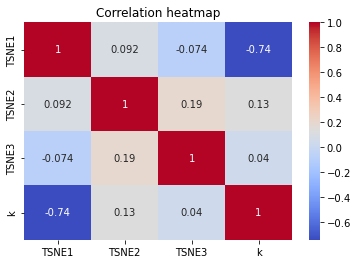

In [23]:
corr = df_TSNE.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

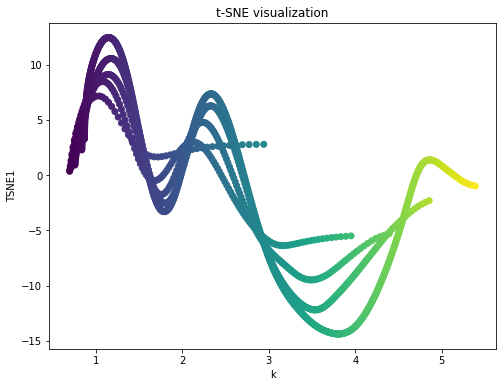

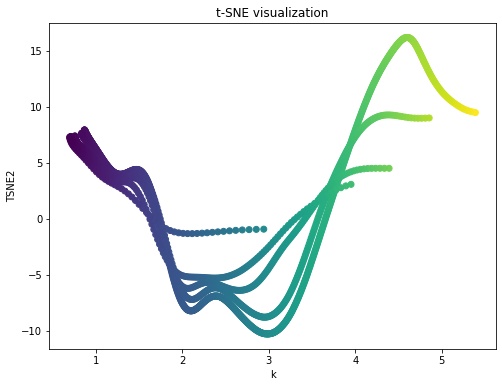

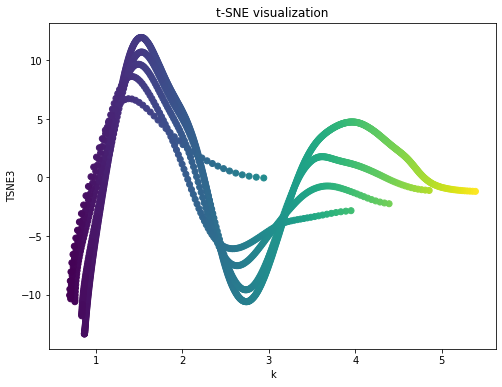

In [24]:
for i in range (1,4):
    plt.figure(figsize=(8,6))
    plt.scatter(df_TSNE['k'], df_TSNE[f"TSNE{i}"], c = df_TSNE["k"])
    plt.title('t-SNE visualization')
    plt.xlabel('k')
    plt.ylabel(f"TSNE{i}")
    plt.show()

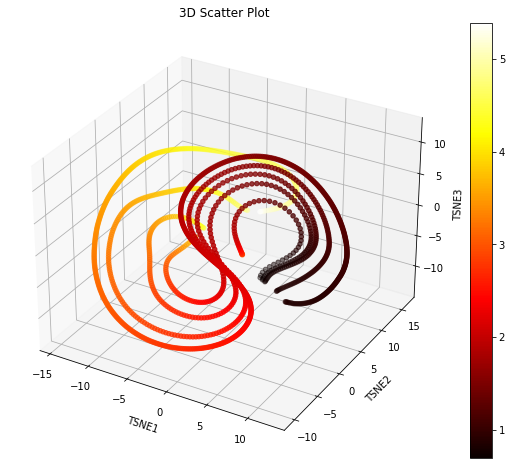

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(df_TSNE['TSNE1'],df_TSNE['TSNE2'],df_TSNE['TSNE3'],c=df_TSNE["k"], cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')
plt.title('3D Scatter Plot')
plt.show()

In [26]:
df_TSNE.to_csv("data_TSNE.csv", index=False)